In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


https://www.kaggle.com/datasets/ishansingh88/europe-hotel-satisfaction-score

In [34]:
df = pd.read_csv("../input/europe-hotel-satisfaction-score/Europe Hotel Booking Satisfaction Score.csv")
pd.set_option('display.max_columns', None)
proc_df = df.copy()
proc_df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [36]:
df.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


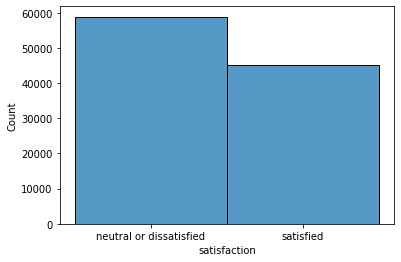

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(df["satisfaction"])
plt.show()

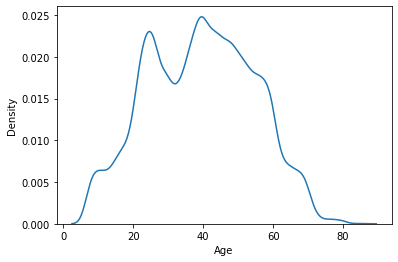

In [38]:
sns.kdeplot(proc_df['Age'])

plt.show()

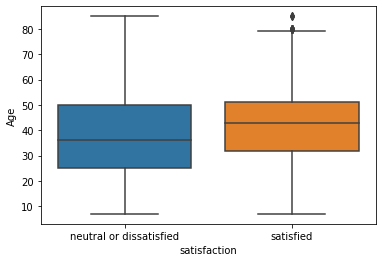

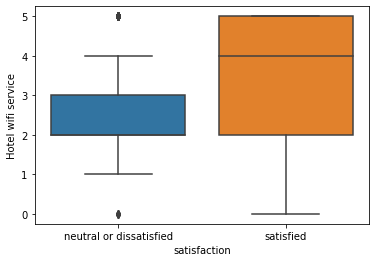

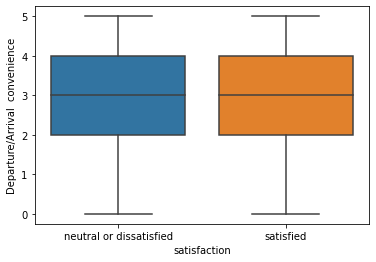

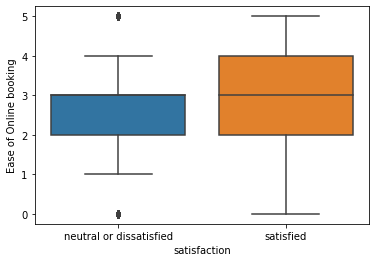

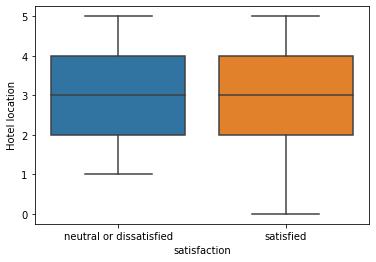

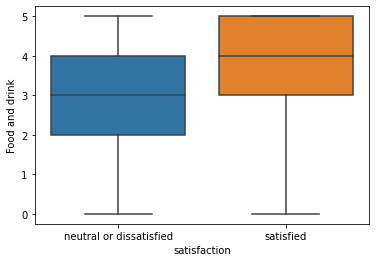

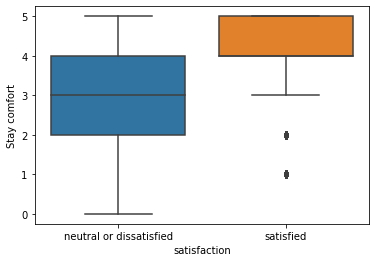

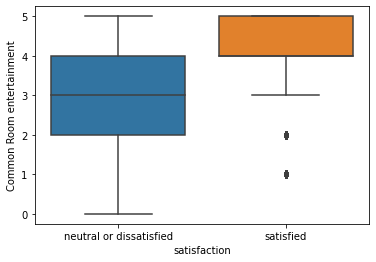

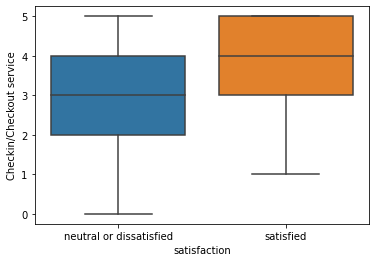

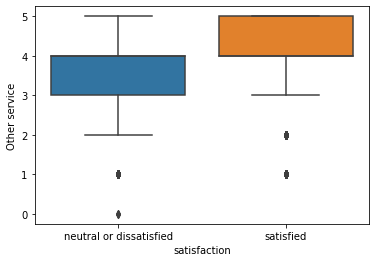

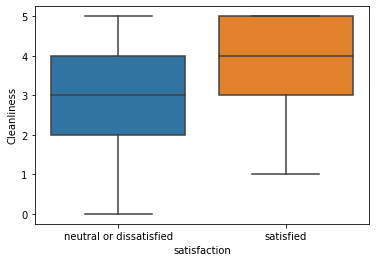

In [39]:
rating_columns = [
    'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness'
]

figure = plt.figure()
ax = sns.boxplot(x='satisfaction', y=proc_df["Age"], data=proc_df)

for column in rating_columns:
    figure = plt.figure()
    ax = sns.boxplot(x='satisfaction', y=proc_df[column], data=proc_df)


    
plt.show()

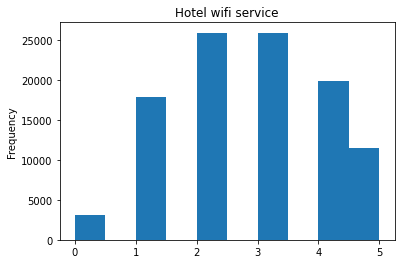

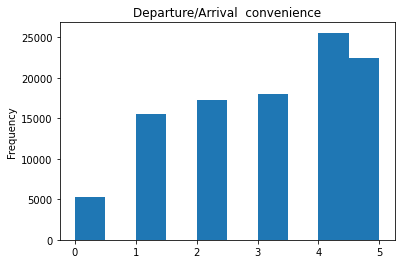

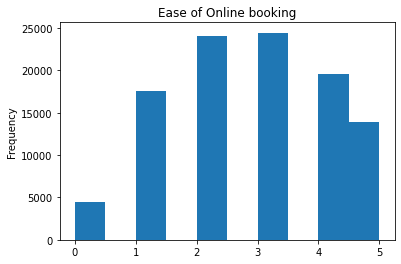

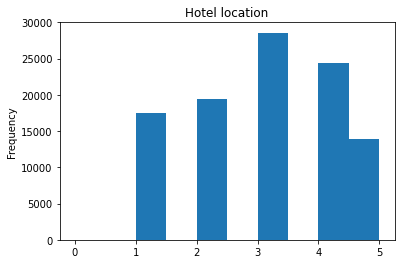

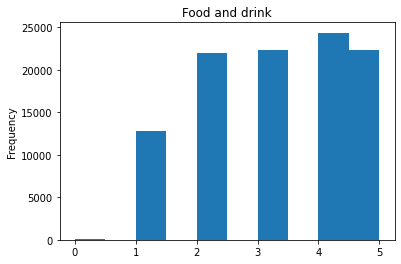

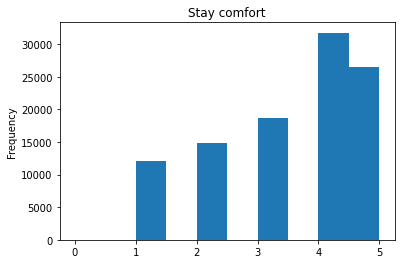

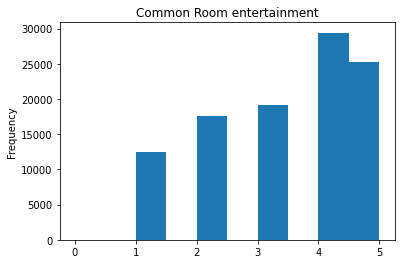

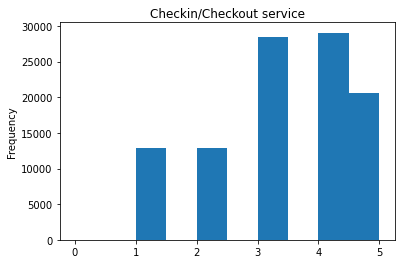

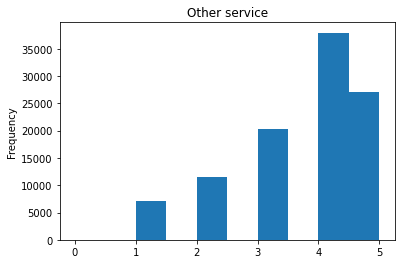

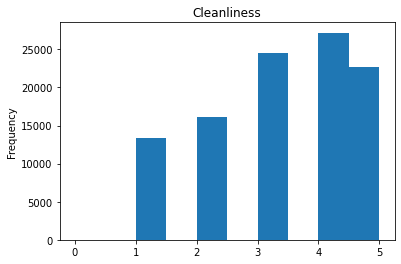

In [40]:
for column in rating_columns:
    proc_df[column].plot(kind="hist", title=column)

    plt.show()

In [41]:
categorical_columns = [
    "purpose_of_travel", "Type of Travel", "Type Of Booking", "Gender"
]

proc_df[categorical_columns] = proc_df[categorical_columns].astype(str)
dummies = pd.get_dummies(proc_df[categorical_columns], prefix=categorical_columns) 
proc_df = pd.concat([proc_df, dummies], axis=1)
proc_df.drop(categorical_columns, inplace=True, axis=1)

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,25,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,26,2,2,2,2,5,5,5,4,4,5,satisfied,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,25,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,61,3,3,3,3,4,5,3,3,3,3,satisfied,0,1,0,0,0,1,0,1,0,0,0,1


In [42]:
proc_df['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,3,4,3,1,5,5,5,4,5,5,0,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,25,3,2,3,3,1,1,1,1,4,1,0,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,26,2,2,2,2,5,5,5,4,4,5,1,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,25,2,5,5,5,2,2,2,1,4,2,0,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,61,3,3,3,3,4,5,3,3,3,3,1,0,1,0,0,0,1,0,1,0,0,0,1


In [43]:
proc_df.columns

proc_df[rating_columns] /= 5

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,0.6,0.8,0.6,0.2,1.0,1.0,1.0,0.8,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,25,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,0.2,0,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,26,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,1.0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,25,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,0.4,0,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,61,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,0.6,1,0,1,0,0,0,1,0,1,0,0,0,1


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
proc_df['Age'] = scaler.fit_transform(proc_df[['Age']])

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,-1.745279,0.6,0.8,0.6,0.2,1.0,1.0,1.0,0.8,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,-0.951360,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,0.2,0,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,-0.885200,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,1.0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,-0.951360,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,0.4,0,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,1.430397,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,0.6,1,0,1,0,0,0,1,0,1,0,0,0,1


In [45]:
proc_df.drop(['id'], axis=1, inplace=True)

proc_df.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,-1.745279,0.6,0.8,0.6,0.2,1.0,1.0,1.0,0.8,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,-0.951360,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,0.2,0,0,0,0,0,1,1,0,1,0,0,0,1
2,-0.885200,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,1.0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,-0.951360,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,0.4,0,0,0,0,0,1,1,0,1,0,0,1,0
4,1.430397,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,0.6,1,0,1,0,0,0,1,0,1,0,0,0,1


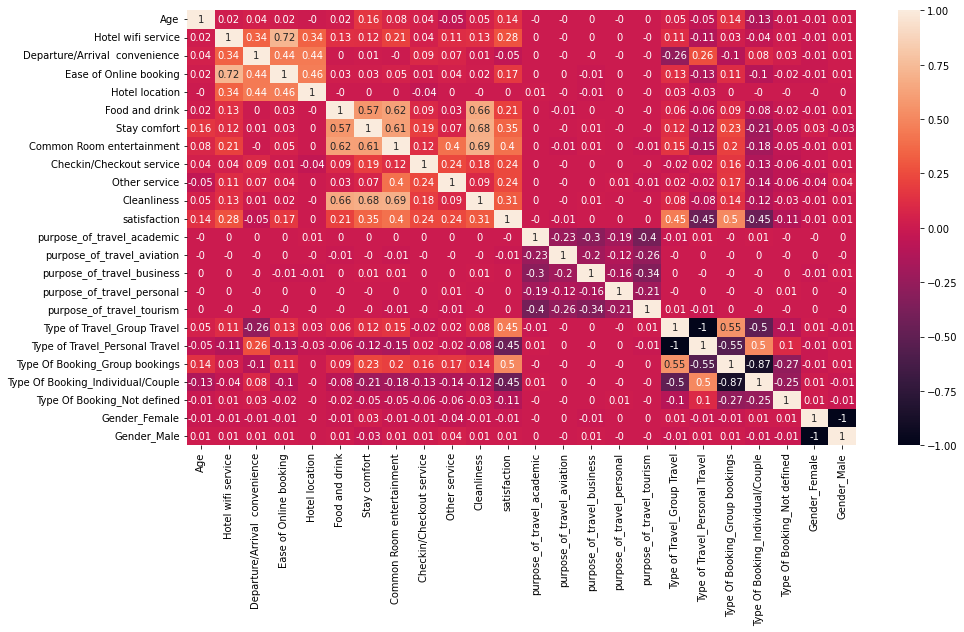

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 8))

sns.heatmap(proc_df.corr().round(2), annot=True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
y = proc_df["satisfaction"]
X = proc_df.drop("satisfaction", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(98708, 23) (5196, 23) (98708,) (5196,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [184]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[2734  175]
 [ 372 1915]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2909
           1       0.92      0.84      0.88      2287

    accuracy                           0.89      5196
   macro avg       0.90      0.89      0.89      5196
weighted avg       0.90      0.89      0.89      5196

0.8947267128560431


In [185]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

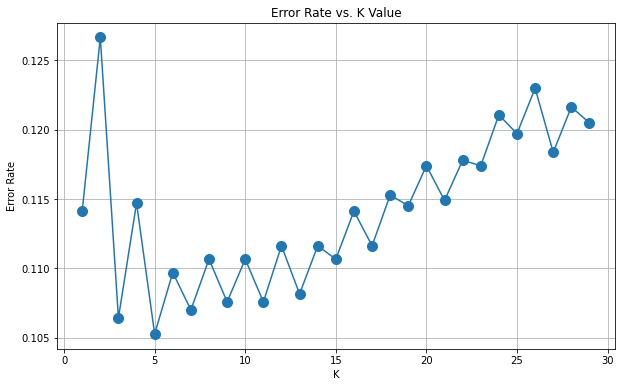

In [186]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [196]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[2747  162]
 [ 218 2069]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2909
           1       0.93      0.90      0.92      2287

    accuracy                           0.93      5196
   macro avg       0.93      0.92      0.93      5196
weighted avg       0.93      0.93      0.93      5196

0.9268668206312548


In [29]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[501  44]
 [ 47 408]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       545
           1       0.90      0.90      0.90       455

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [191]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2909
           1       0.92      0.92      0.92      2287

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196

[[2728  181]
 [ 193 2094]]


In [192]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2909
           1       0.95      0.93      0.94      2287

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196

[[2800  109]
 [ 156 2131]]
